In [1]:
import os
from glob import glob
import matplotlib.pyplot as plt 
import pandas as pd

import parameters as params

In [2]:
base_path = 'E:/Child Skin Disease(part)/Total_Dataset'
# base_path = os.path.join(base_path, )

In [3]:
train_list = [0, 1, 2, 3, 4, 5, 6, 9]
test_list = [7, 8]

In [4]:
total_list = []
train_classes_list = {}
test_classes_list = {}
# head_cl

In [66]:
# images, labels = 
for i in train_list:
    for cls in os.listdir(os.path.join(base_path, f'H{i}')):
        if os.path.isdir(os.path.join(base_path, f'H{i}', cls)):
            
            if cls not in total_list:
                total_list.append(cls)

            if cls in train_classes_list:
                train_classes_list[cls] += len(glob(os.path.join(base_path, f'H{i}', cls, '*/*.jpg')))
            else:
                train_classes_list[cls] = len(glob(os.path.join(base_path, f'H{i}', cls, '*/*.jpg')))
            

In [67]:
for i in test_list:
    for cls in os.listdir(os.path.join(base_path, f'H{i}')):
        if os.path.isdir(os.path.join(base_path, f'H{i}', cls)):
            
            if cls not in total_list:
                total_list.append(cls)

            if cls in test_classes_list:
                test_classes_list[cls] += len(glob(os.path.join(base_path, f'H{i}', cls, '*/*.jpg')))
            else:
                test_classes_list[cls] = len(glob(os.path.join(base_path, f'H{i}', cls, '*/*.jpg')))

In [7]:
writer = pd.ExcelWriter('C:/Users/user/Desktop/models/child_skin_classification/plots.xlsx', engine = 'xlsxwriter')

In [ ]:
total_df = pd.DataFrame(columns=['Disease', 'Train Count', 'Test Count'])
for i, t in enumerate(total_list):
    total_df.loc[i, 'Disease'] = t 
    total_df.loc[i, 'Train Count'] = train_classes_list[t]
    total_df.loc[i, 'Test Count'] = test_classes_list[t]
    
    
total_df

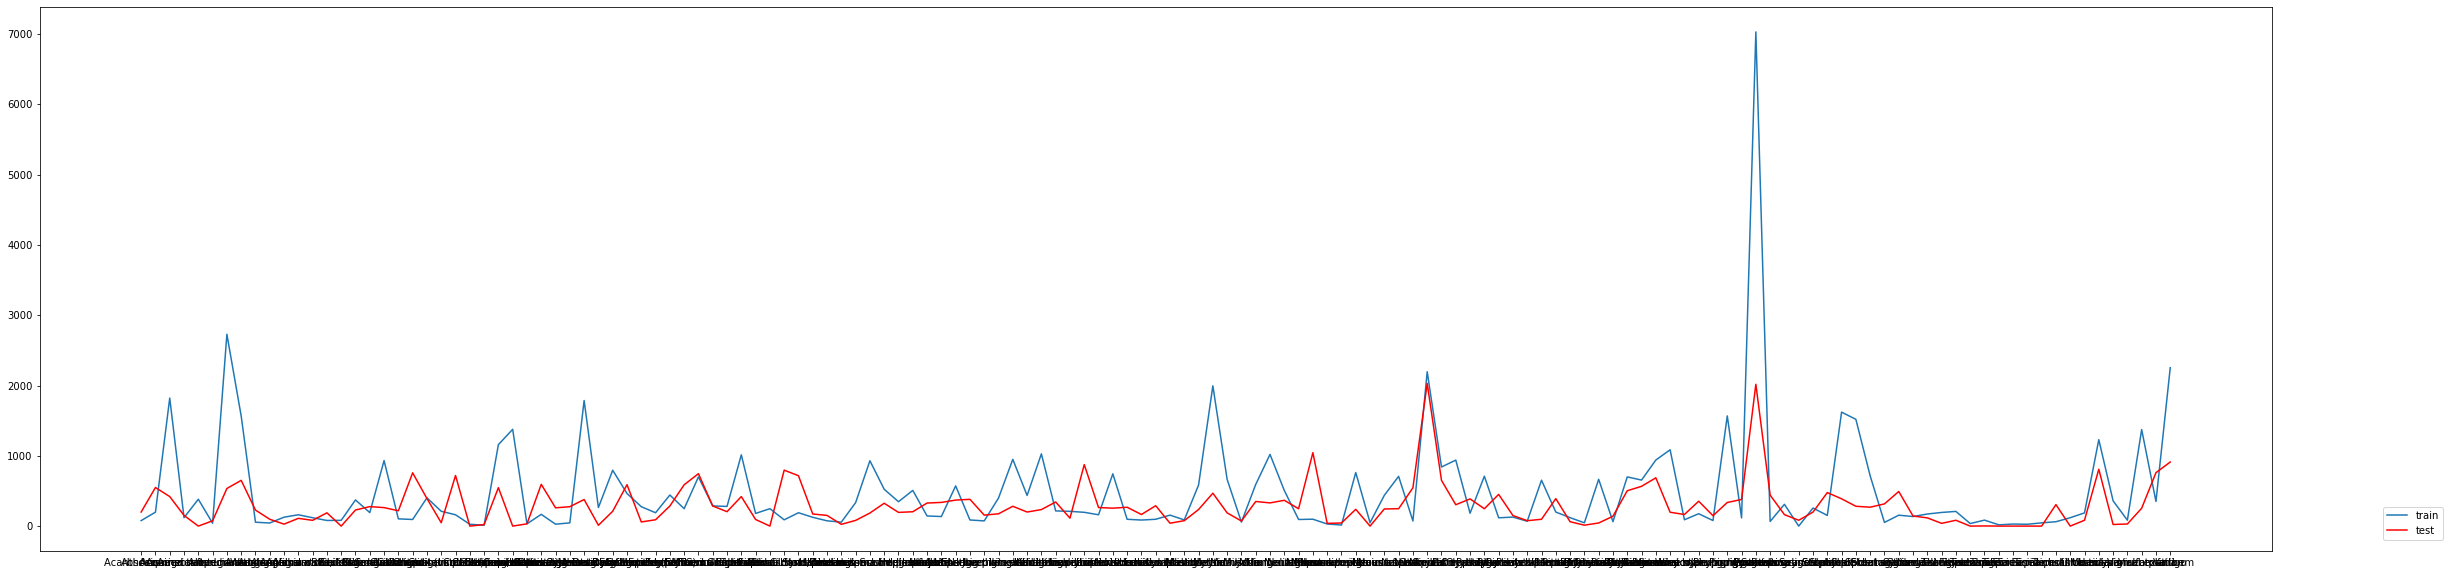

In [54]:
plt.figure(figsize=(40, 10))
plt.plot(total_list, [train_classes_list[i] for i in total_list], label='train')
plt.plot(total_list, [test_classes_list[i] for i in total_list], 'r', label='test')
plt.legend(loc=(1.05, 0.02))
plt.show() 

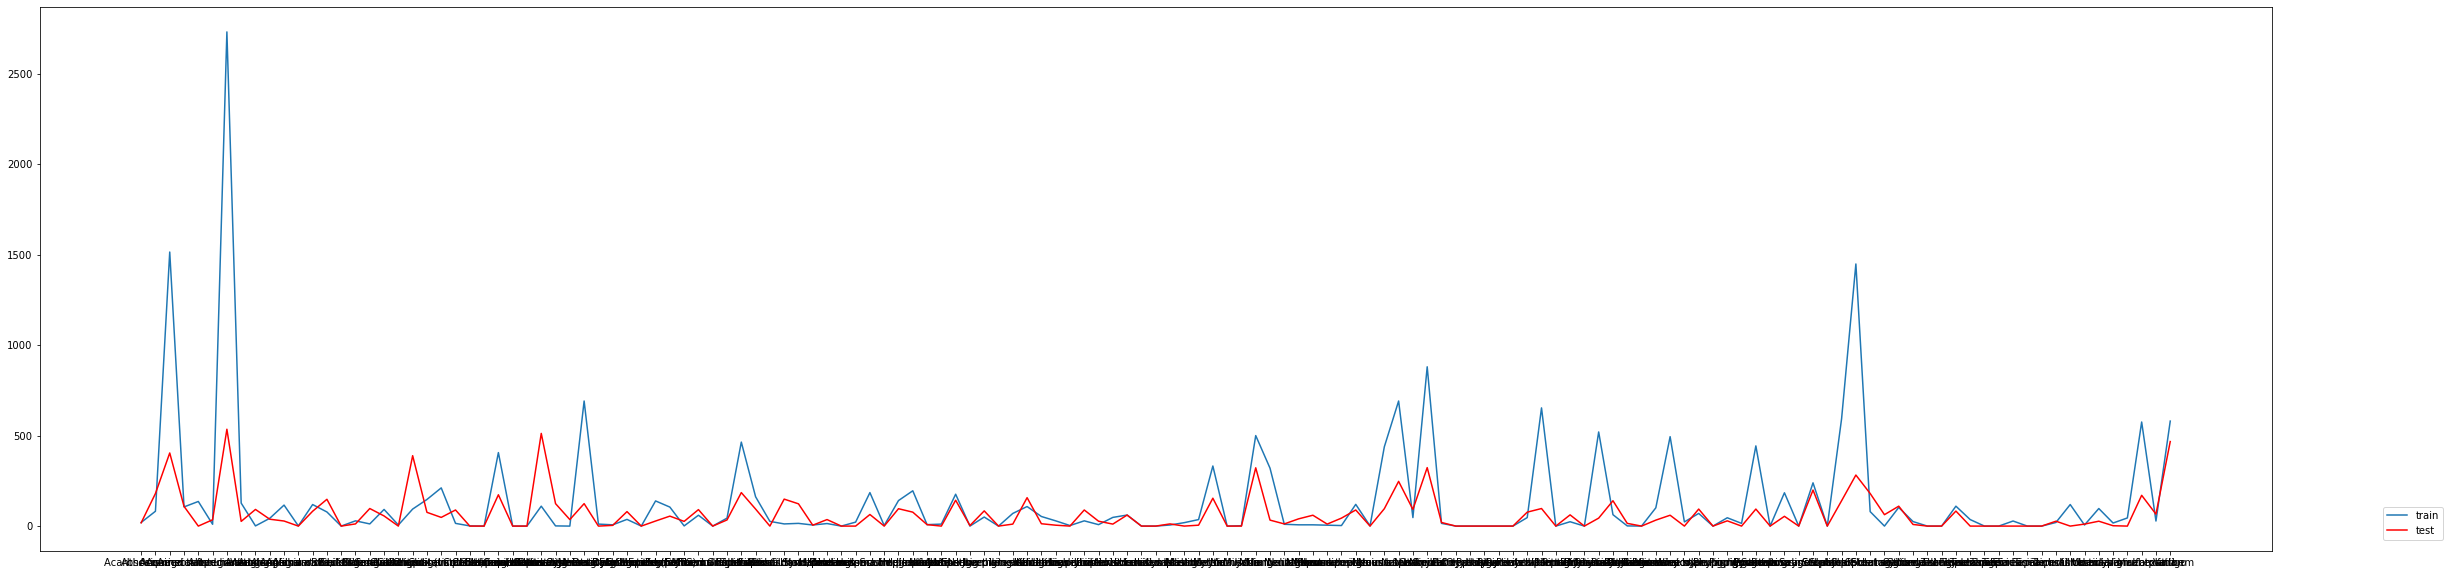

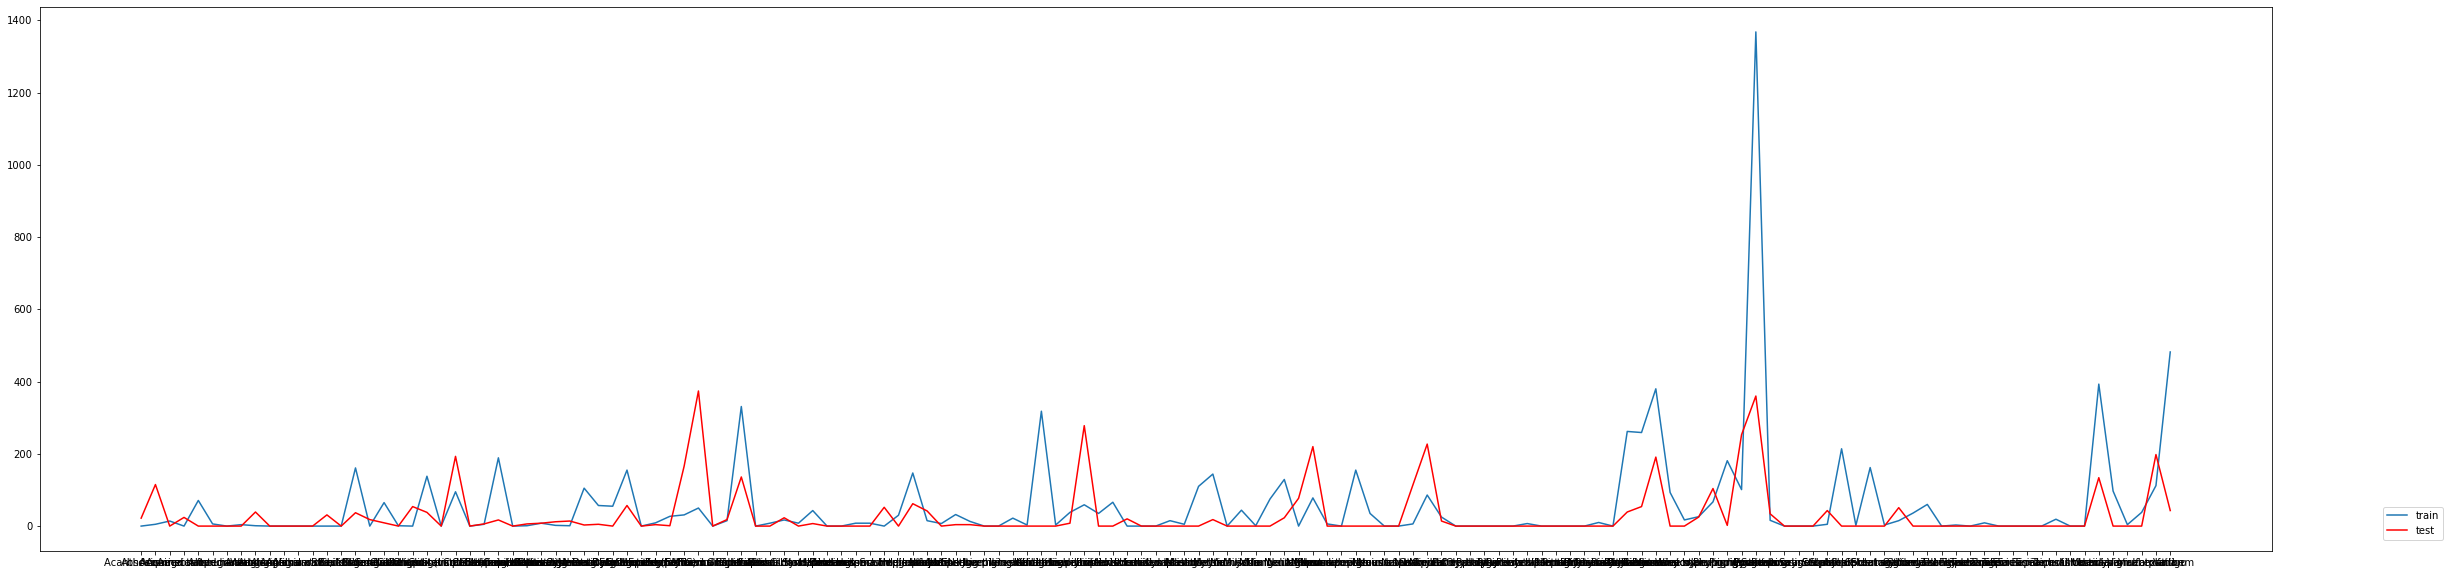

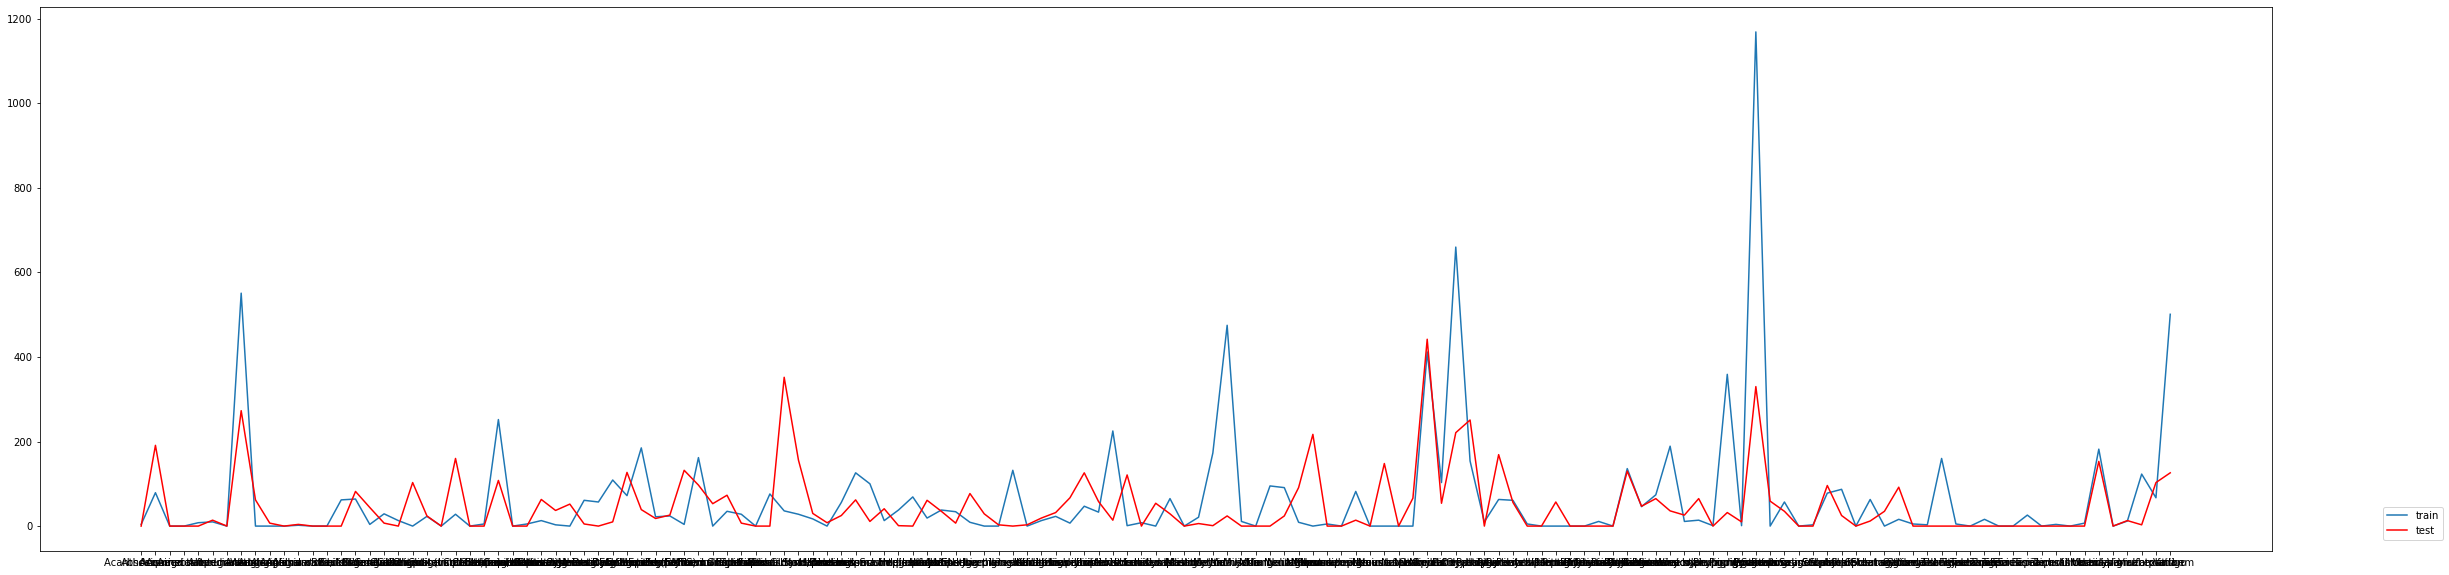

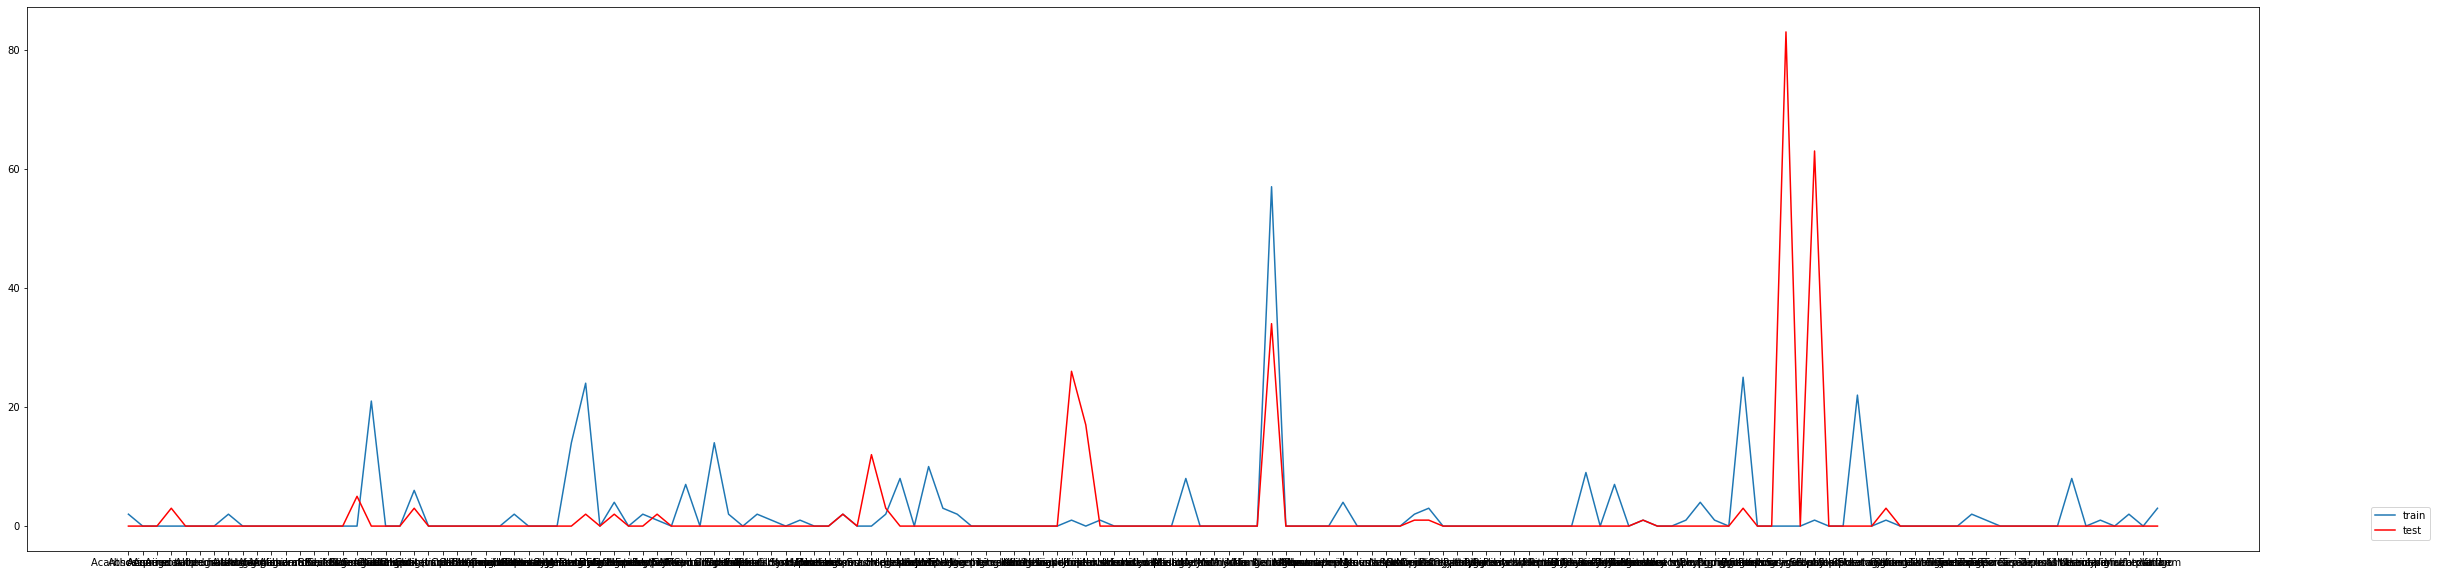

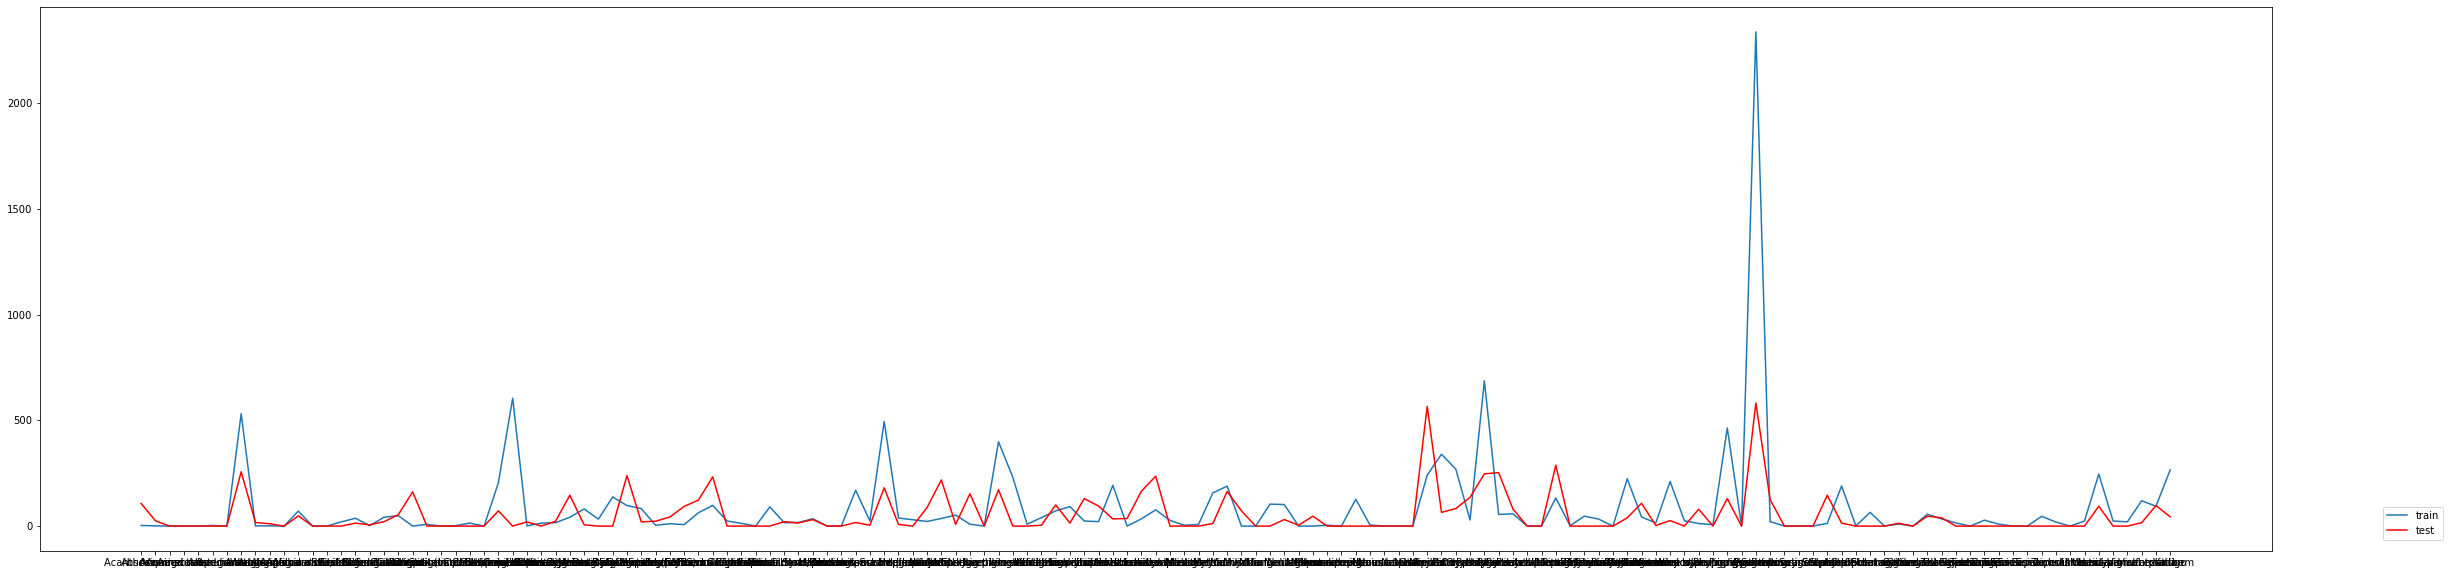

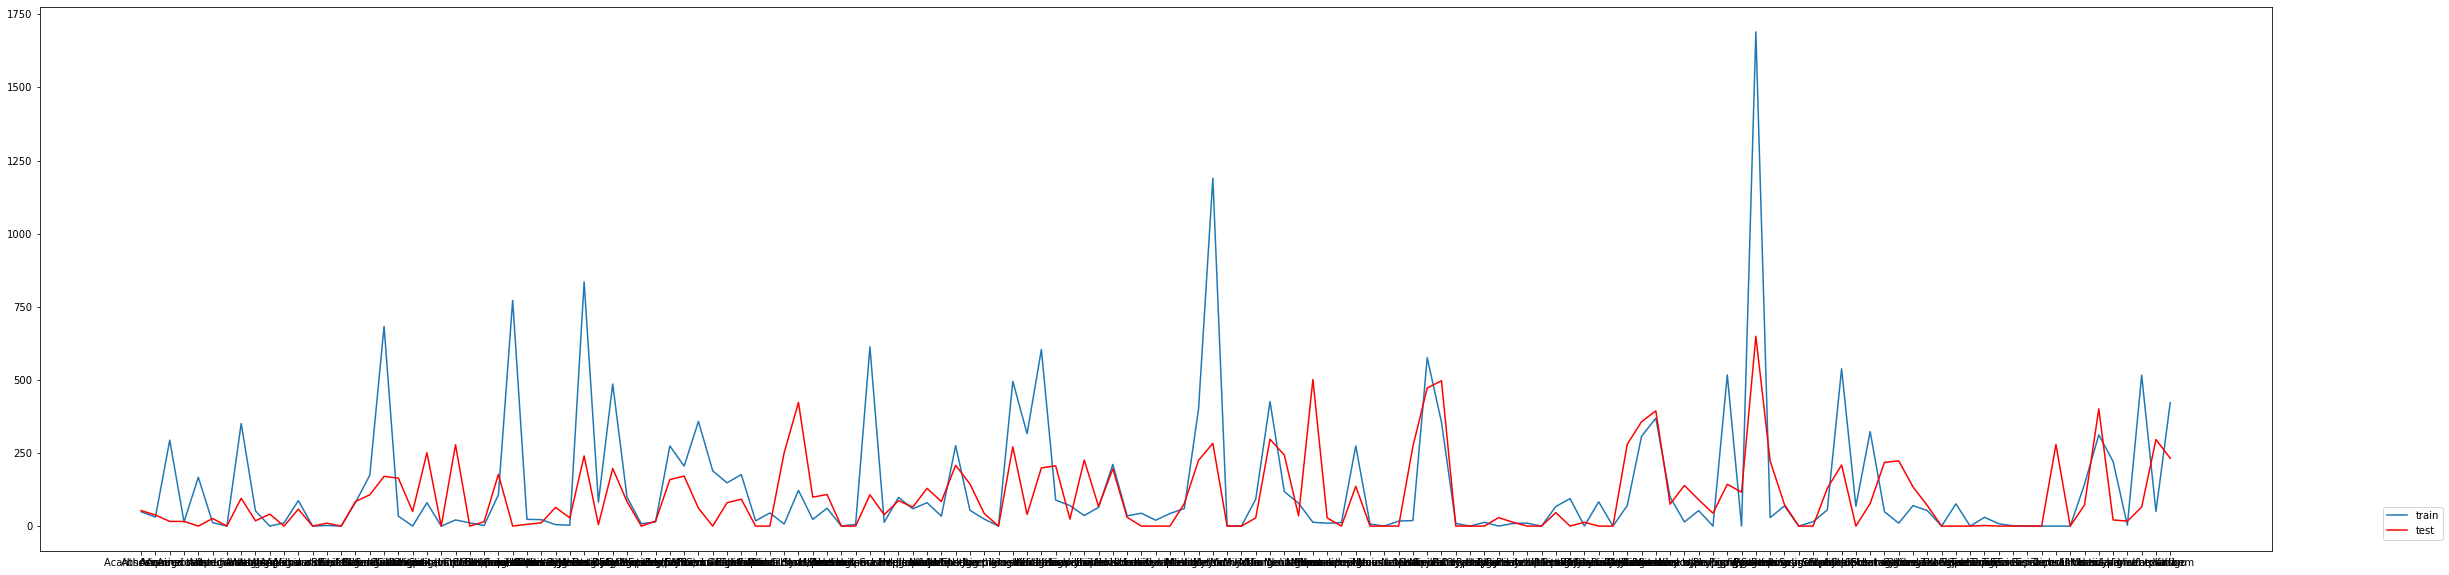

In [57]:
# 'head' : 0, 
# 'body' : 1, 
# 'upper' : 2, 
# 'ass' : 3, 
# 'bottom' : 4,
# 'etc' : 5
parts = ['head', 'body', 'upper', 'ass', 'bottom', 'etc']

for part in parts: 
    
    total_list = []
    train_classes_list = {}
    test_classes_list = {}
    
    for i in train_list:
        for cls in os.listdir(os.path.join(base_path, f'H{i}')):
            if os.path.isdir(os.path.join(base_path, f'H{i}', cls)):
                
                if cls not in total_list:
                    total_list.append(cls)

                if cls in train_classes_list:
                    train_classes_list[cls] += len(glob(os.path.join(base_path, f'H{i}', cls, f'{part}/*.jpg')))
                else:
                    train_classes_list[cls] = len(glob(os.path.join(base_path, f'H{i}', cls, f'{part}/*.jpg')))
                    
                    
    for i in test_list:
        for cls in os.listdir(os.path.join(base_path, f'H{i}')):
            if os.path.isdir(os.path.join(base_path, f'H{i}', cls)):
                
                if cls not in total_list:
                    total_list.append(cls)

                if cls in test_classes_list:
                    test_classes_list[cls] += len(glob(os.path.join(base_path, f'H{i}', cls, f'{part}/*.jpg')))
                else:
                    test_classes_list[cls] = len(glob(os.path.join(base_path, f'H{i}', cls, f'{part}/*.jpg')))
                    
                    
    plt.figure(figsize=(40, 10))
    plt.plot(total_list, [train_classes_list[i] for i in total_list], label='train')
    plt.plot(total_list, [test_classes_list[i] for i in total_list], 'r', label='test')
    plt.legend(loc=(1.05, 0.02))
    plt.show() 


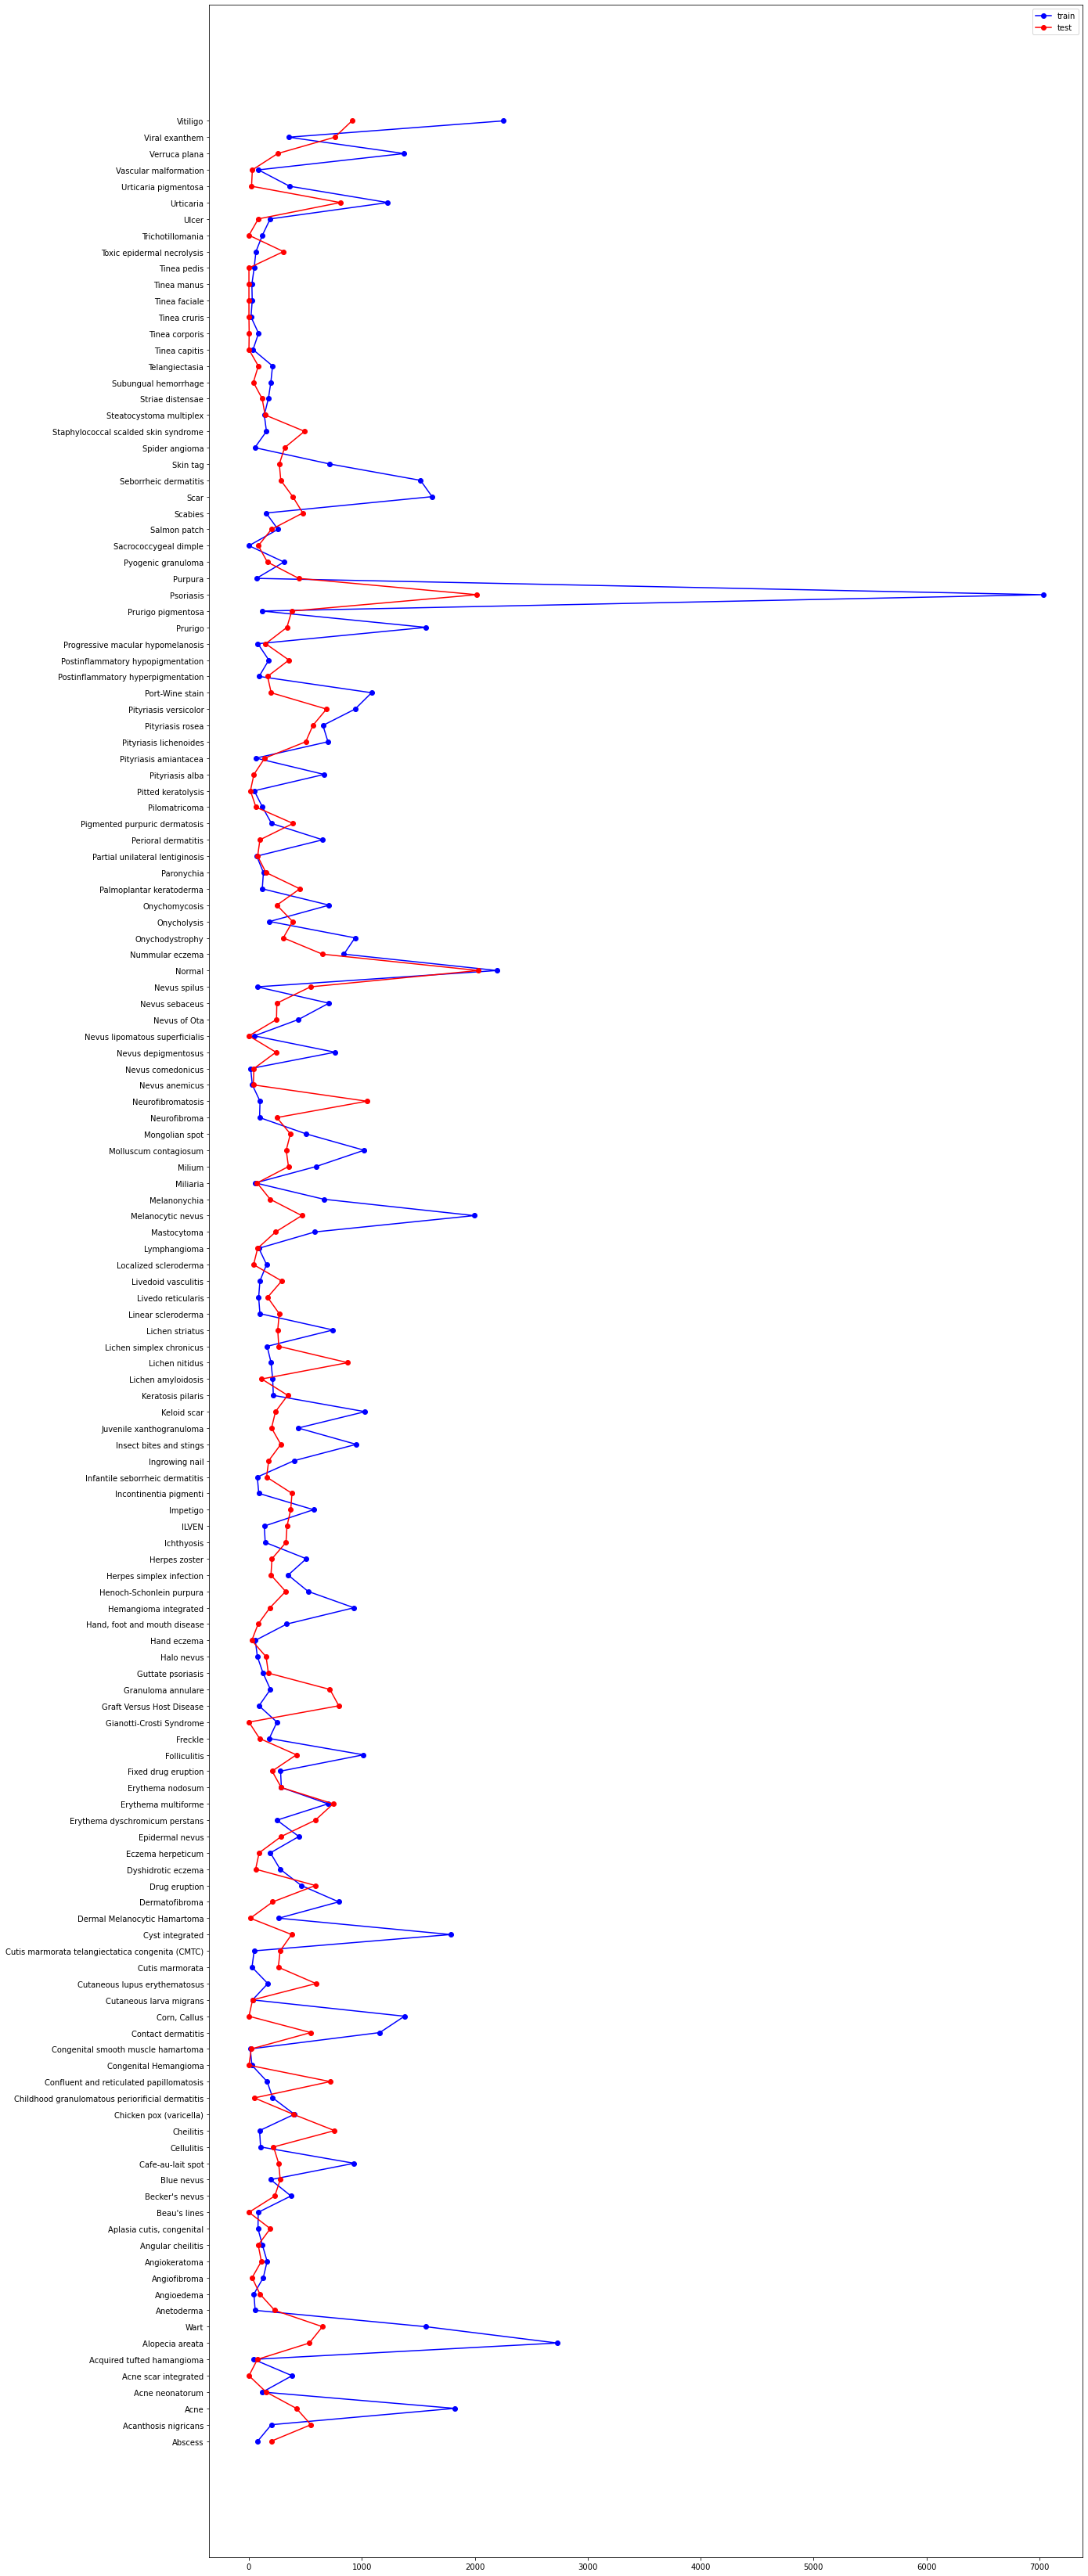

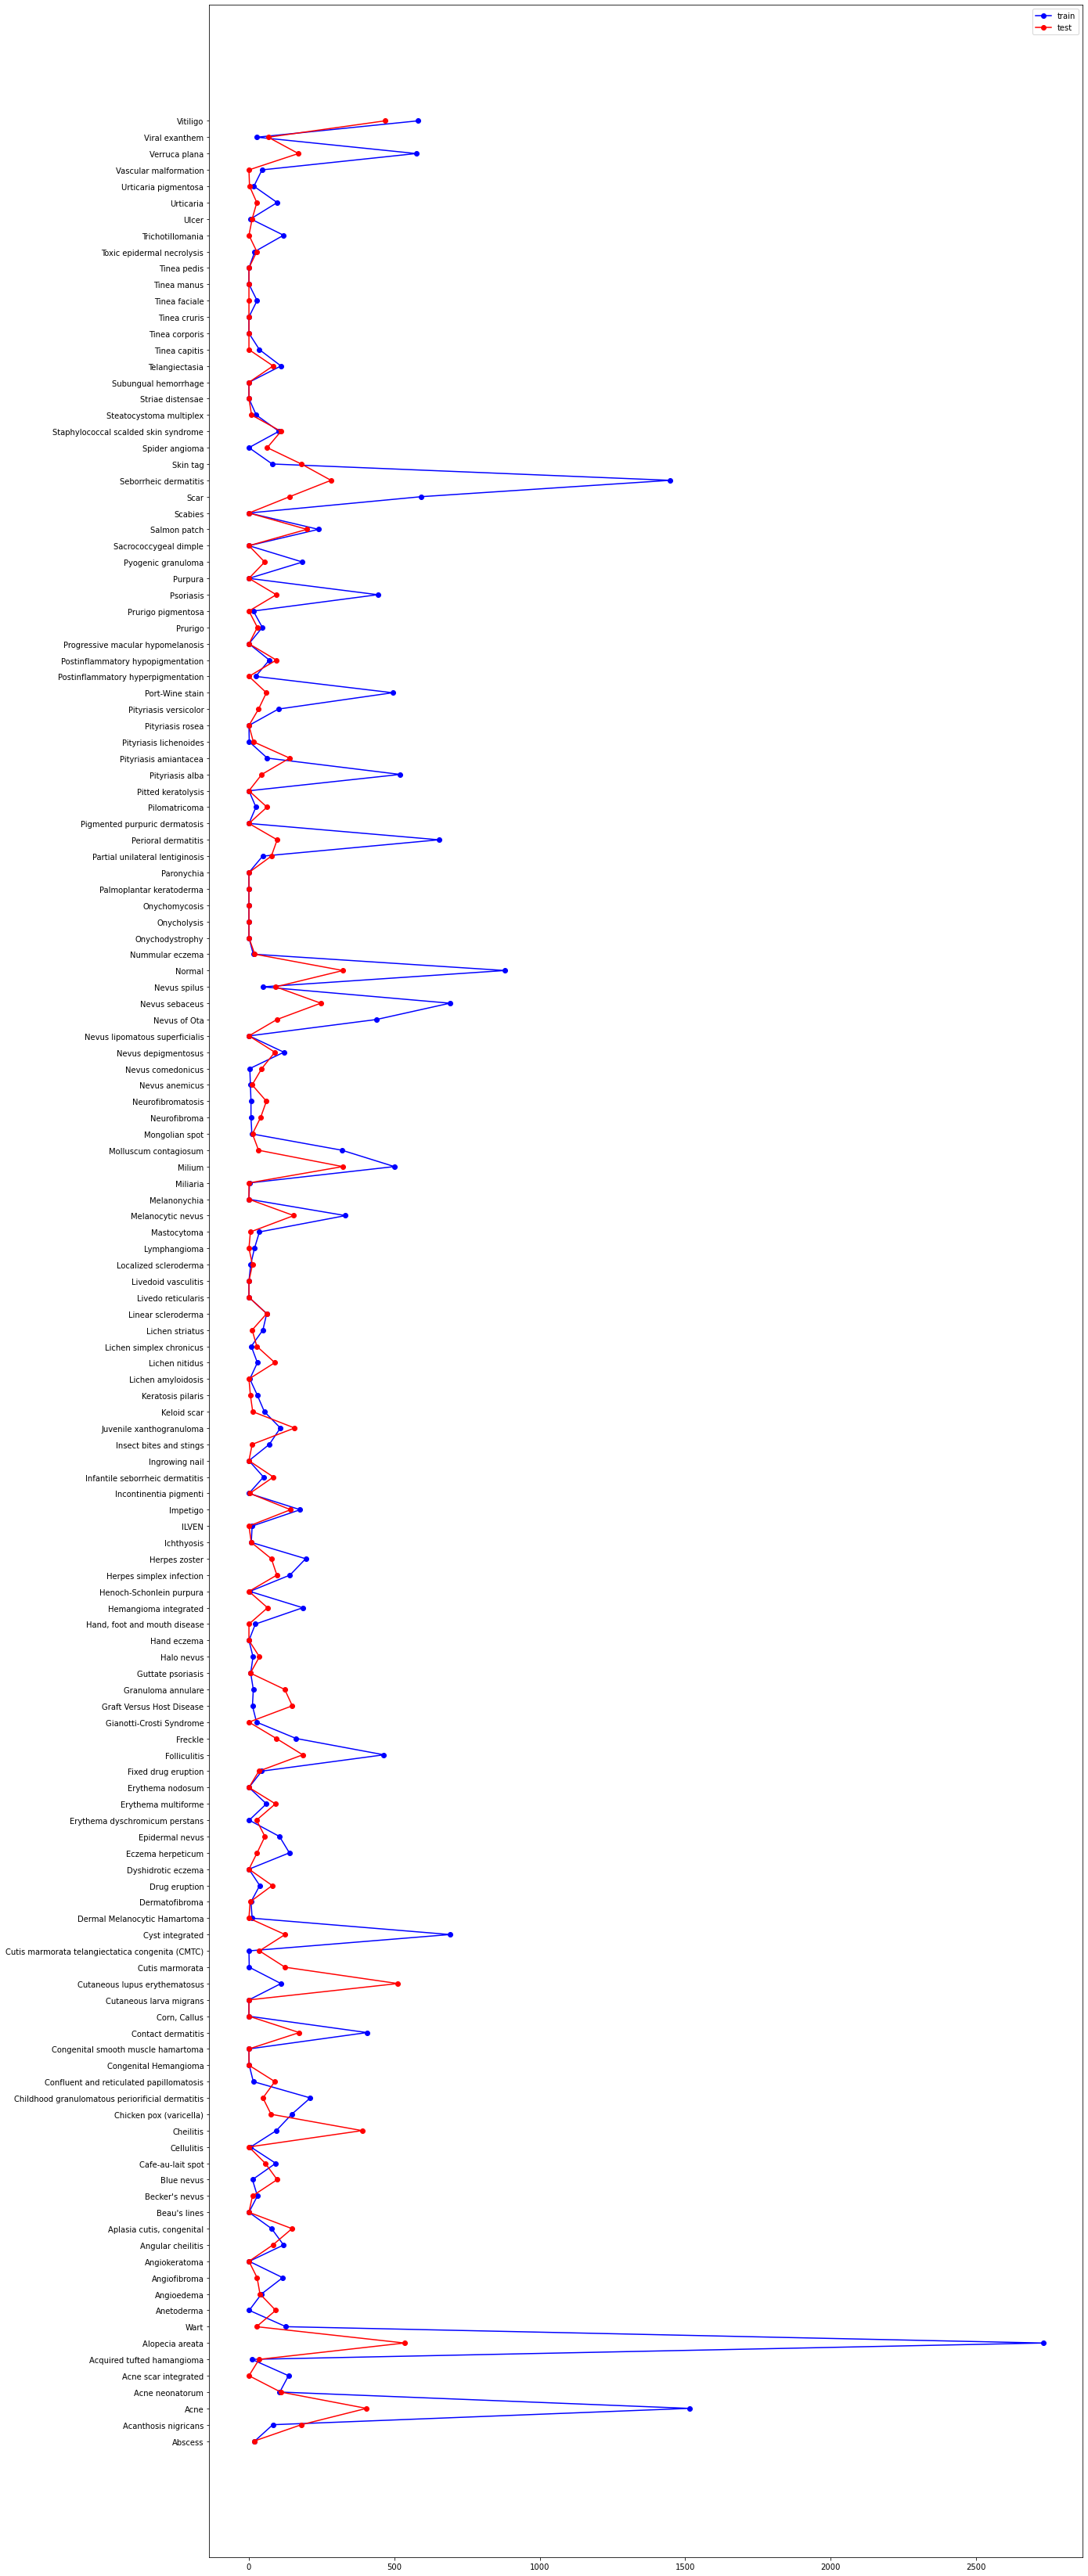

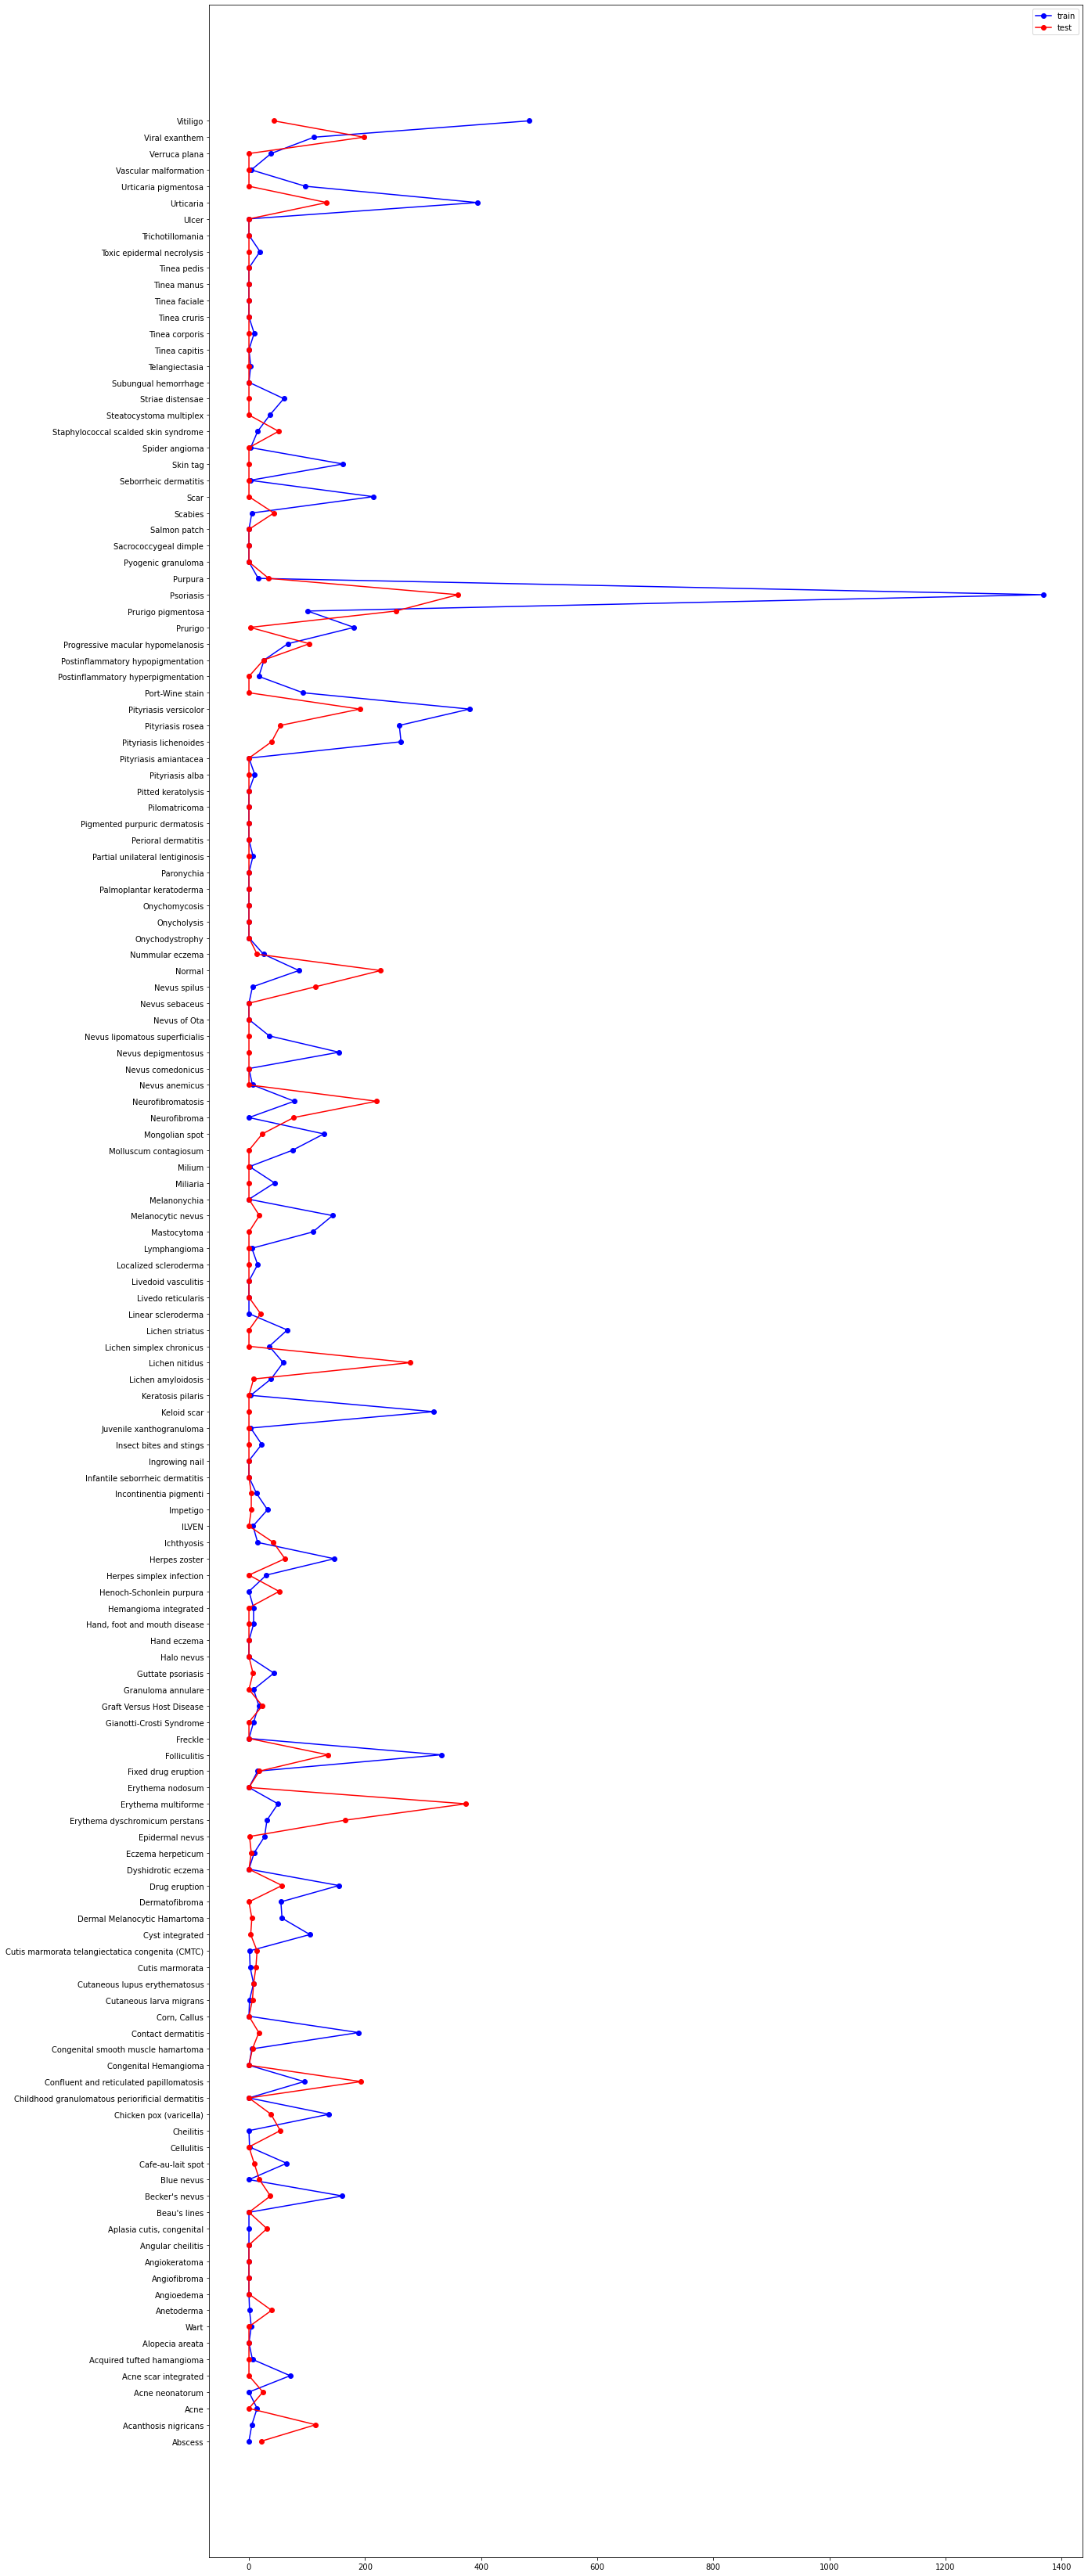

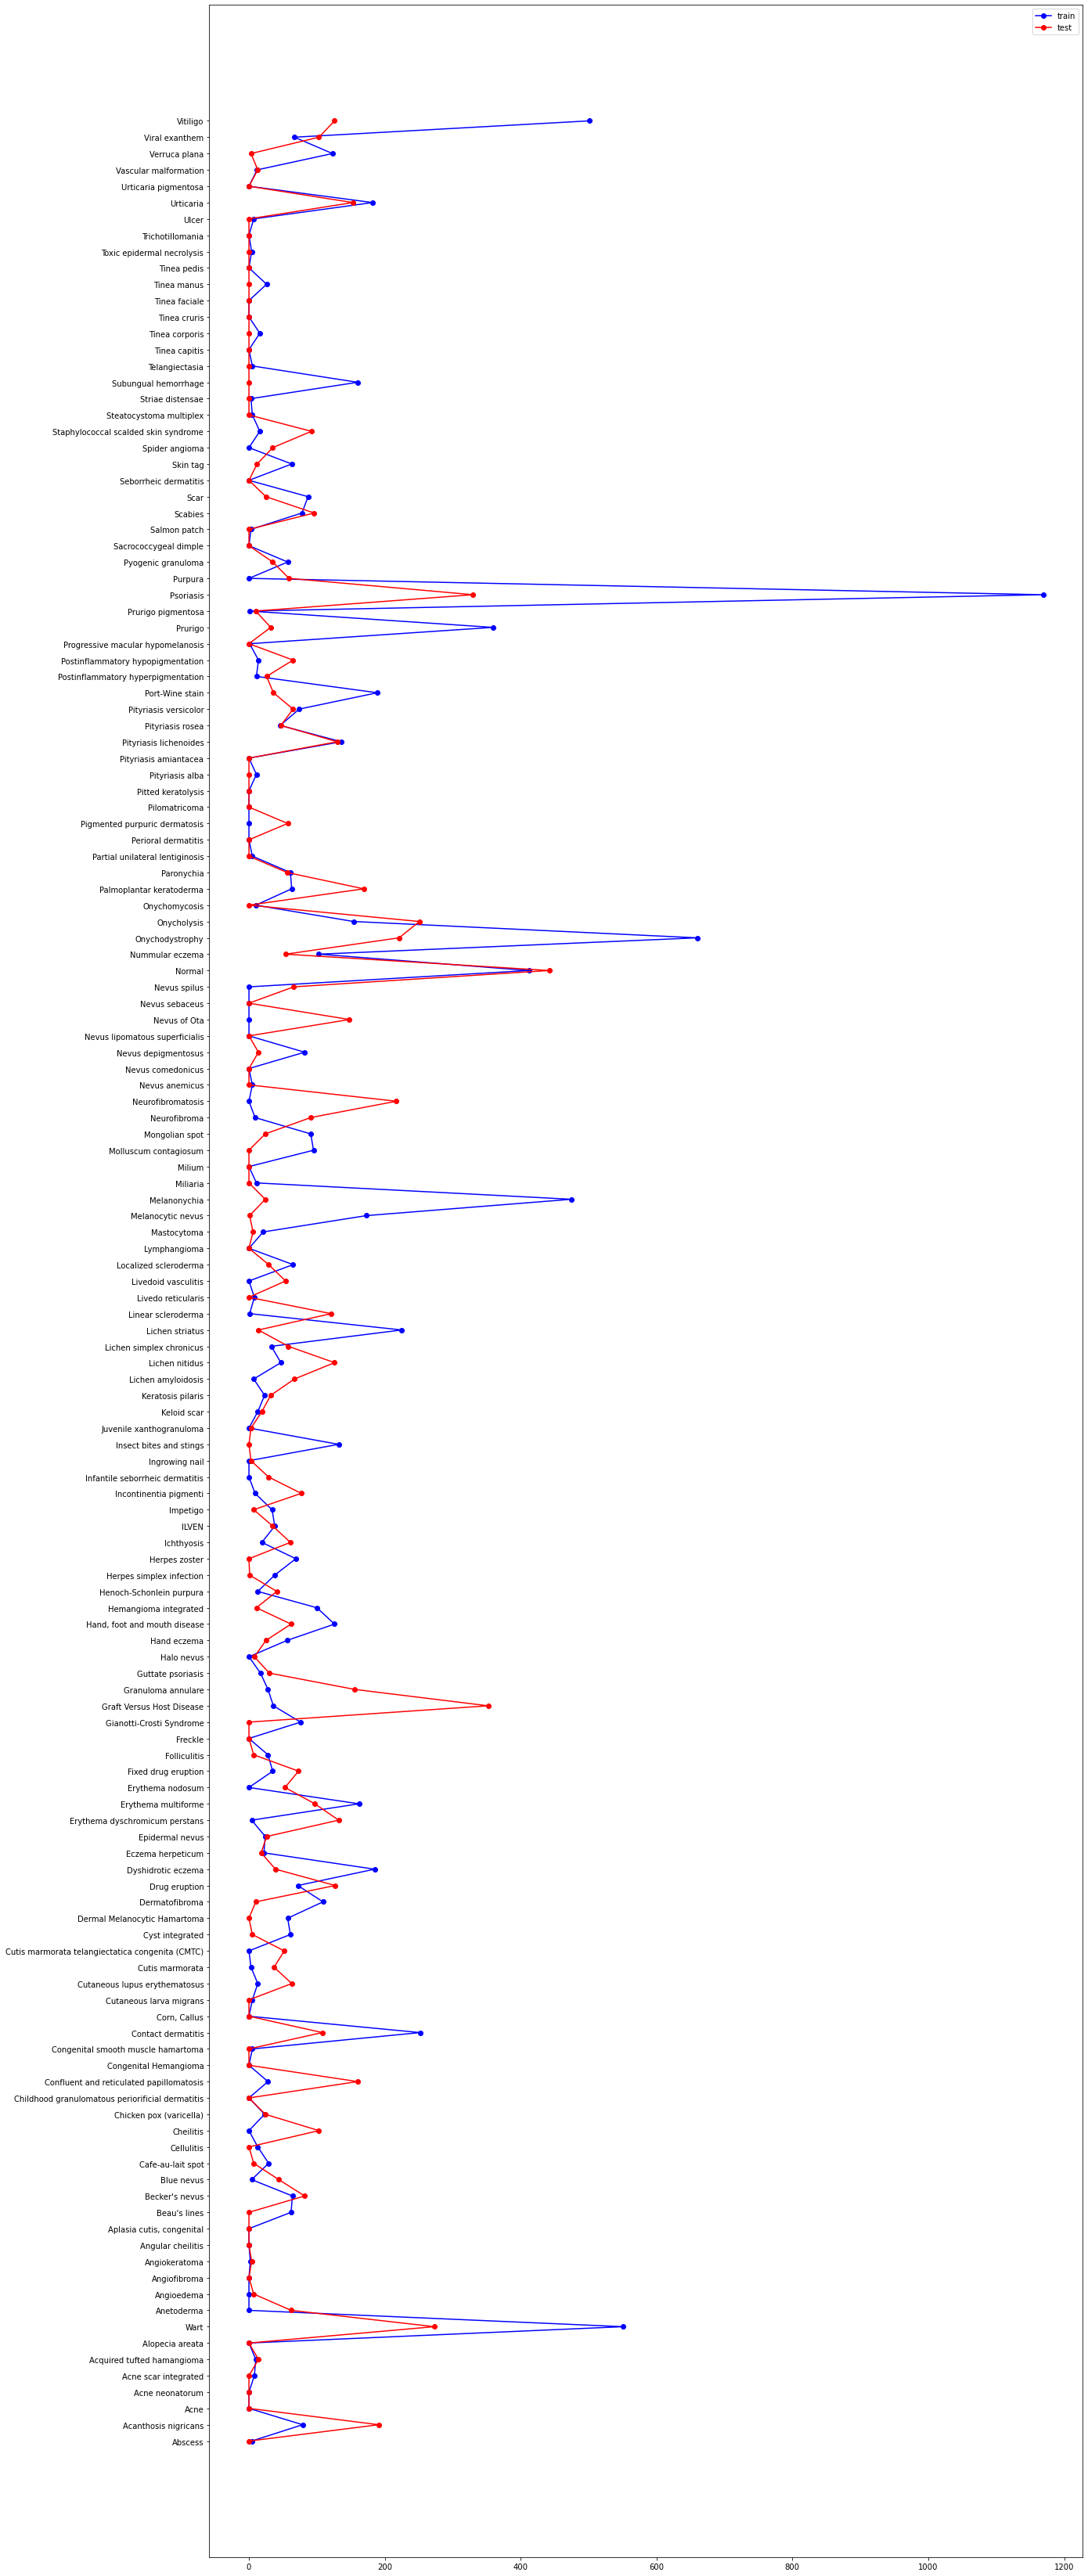

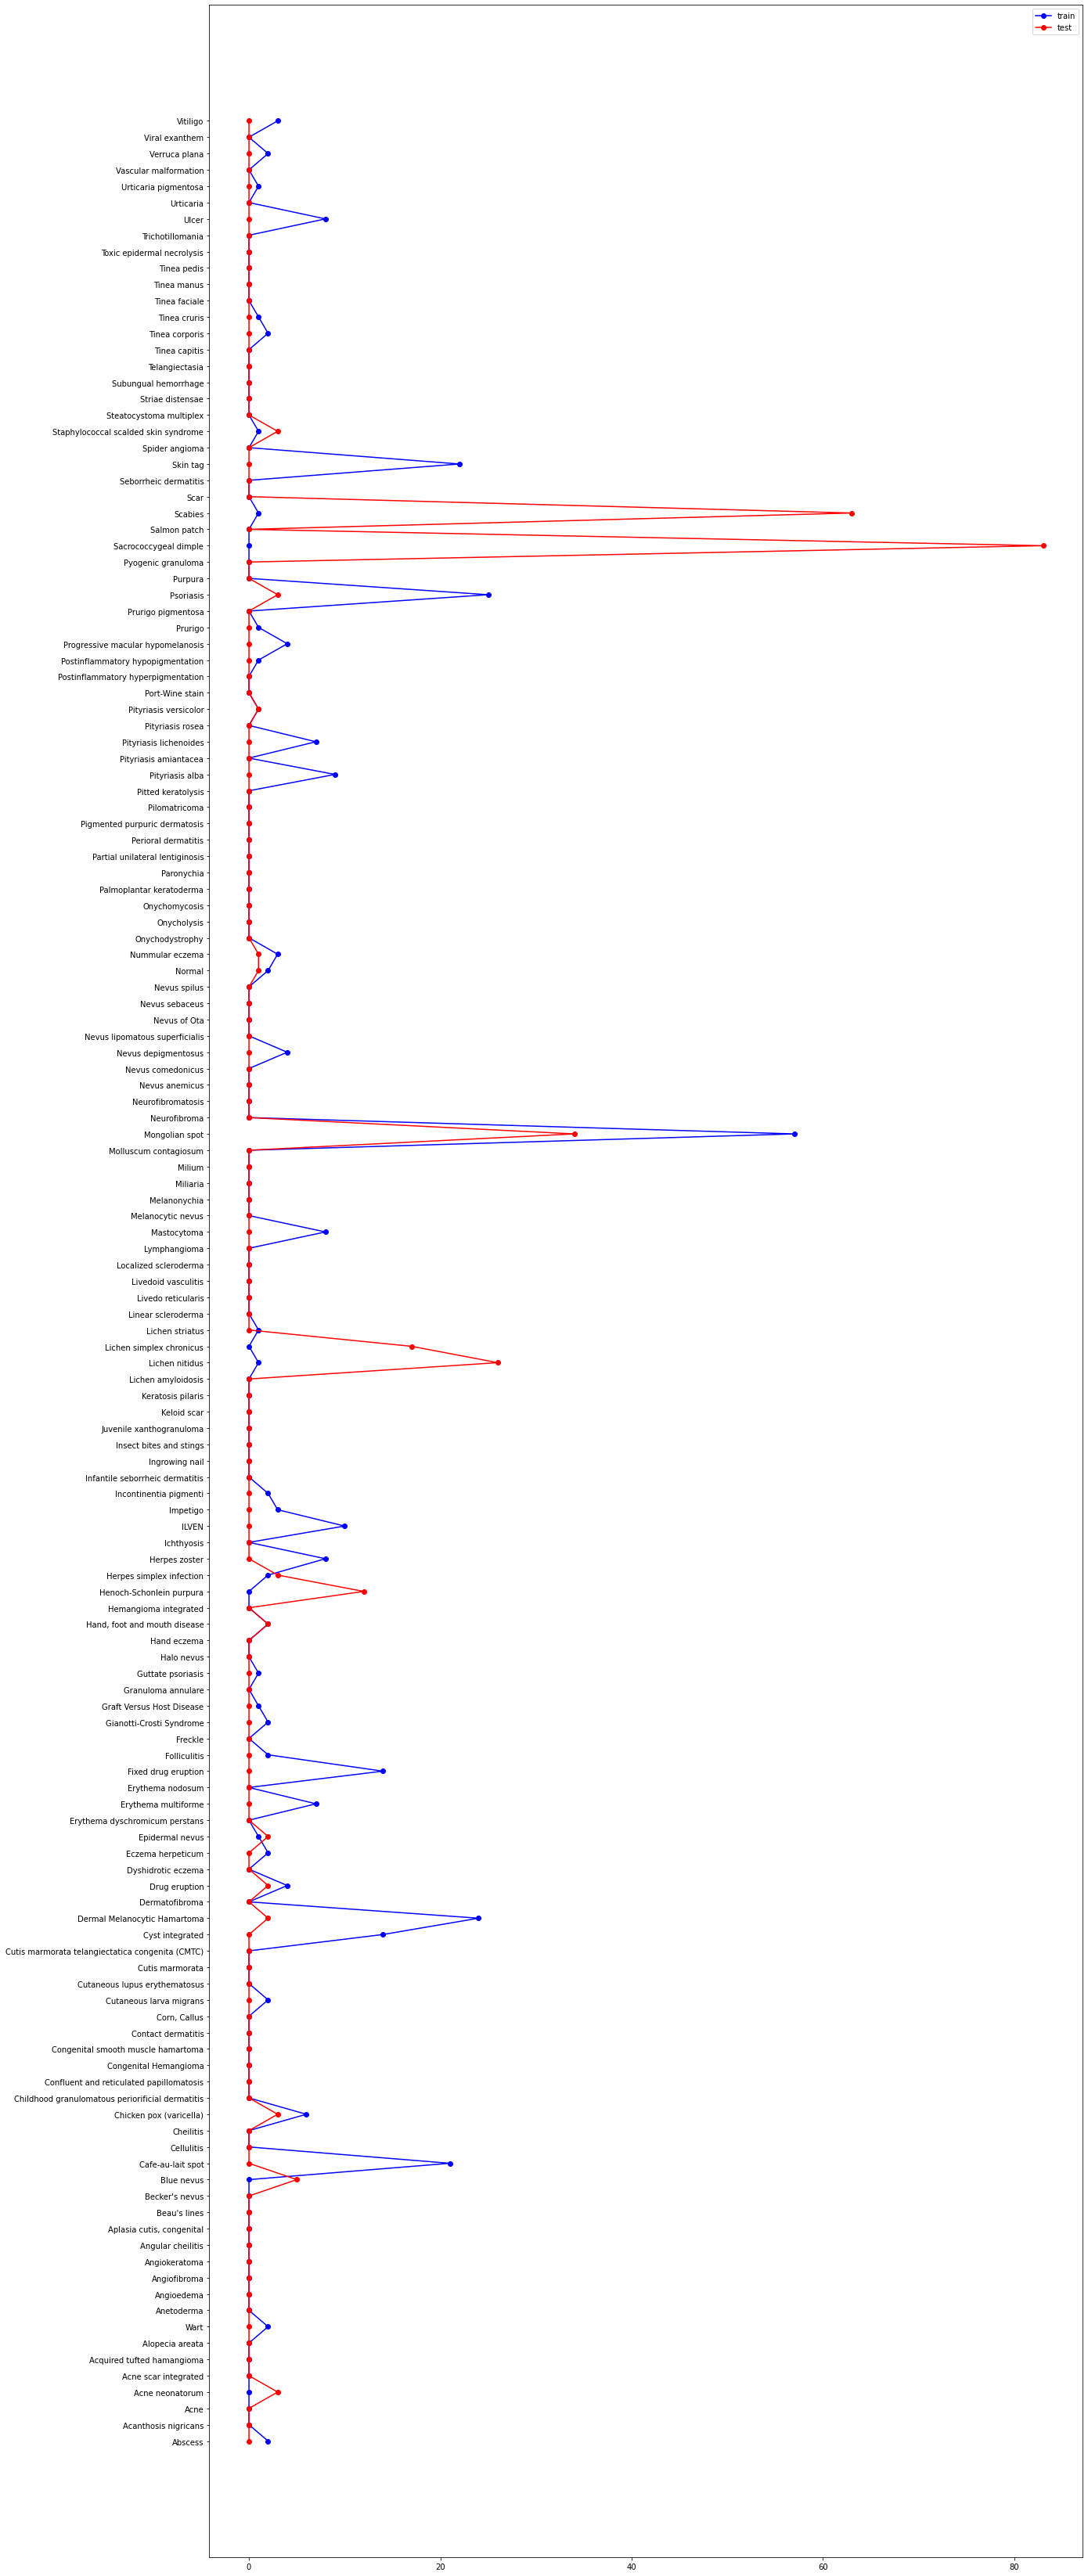

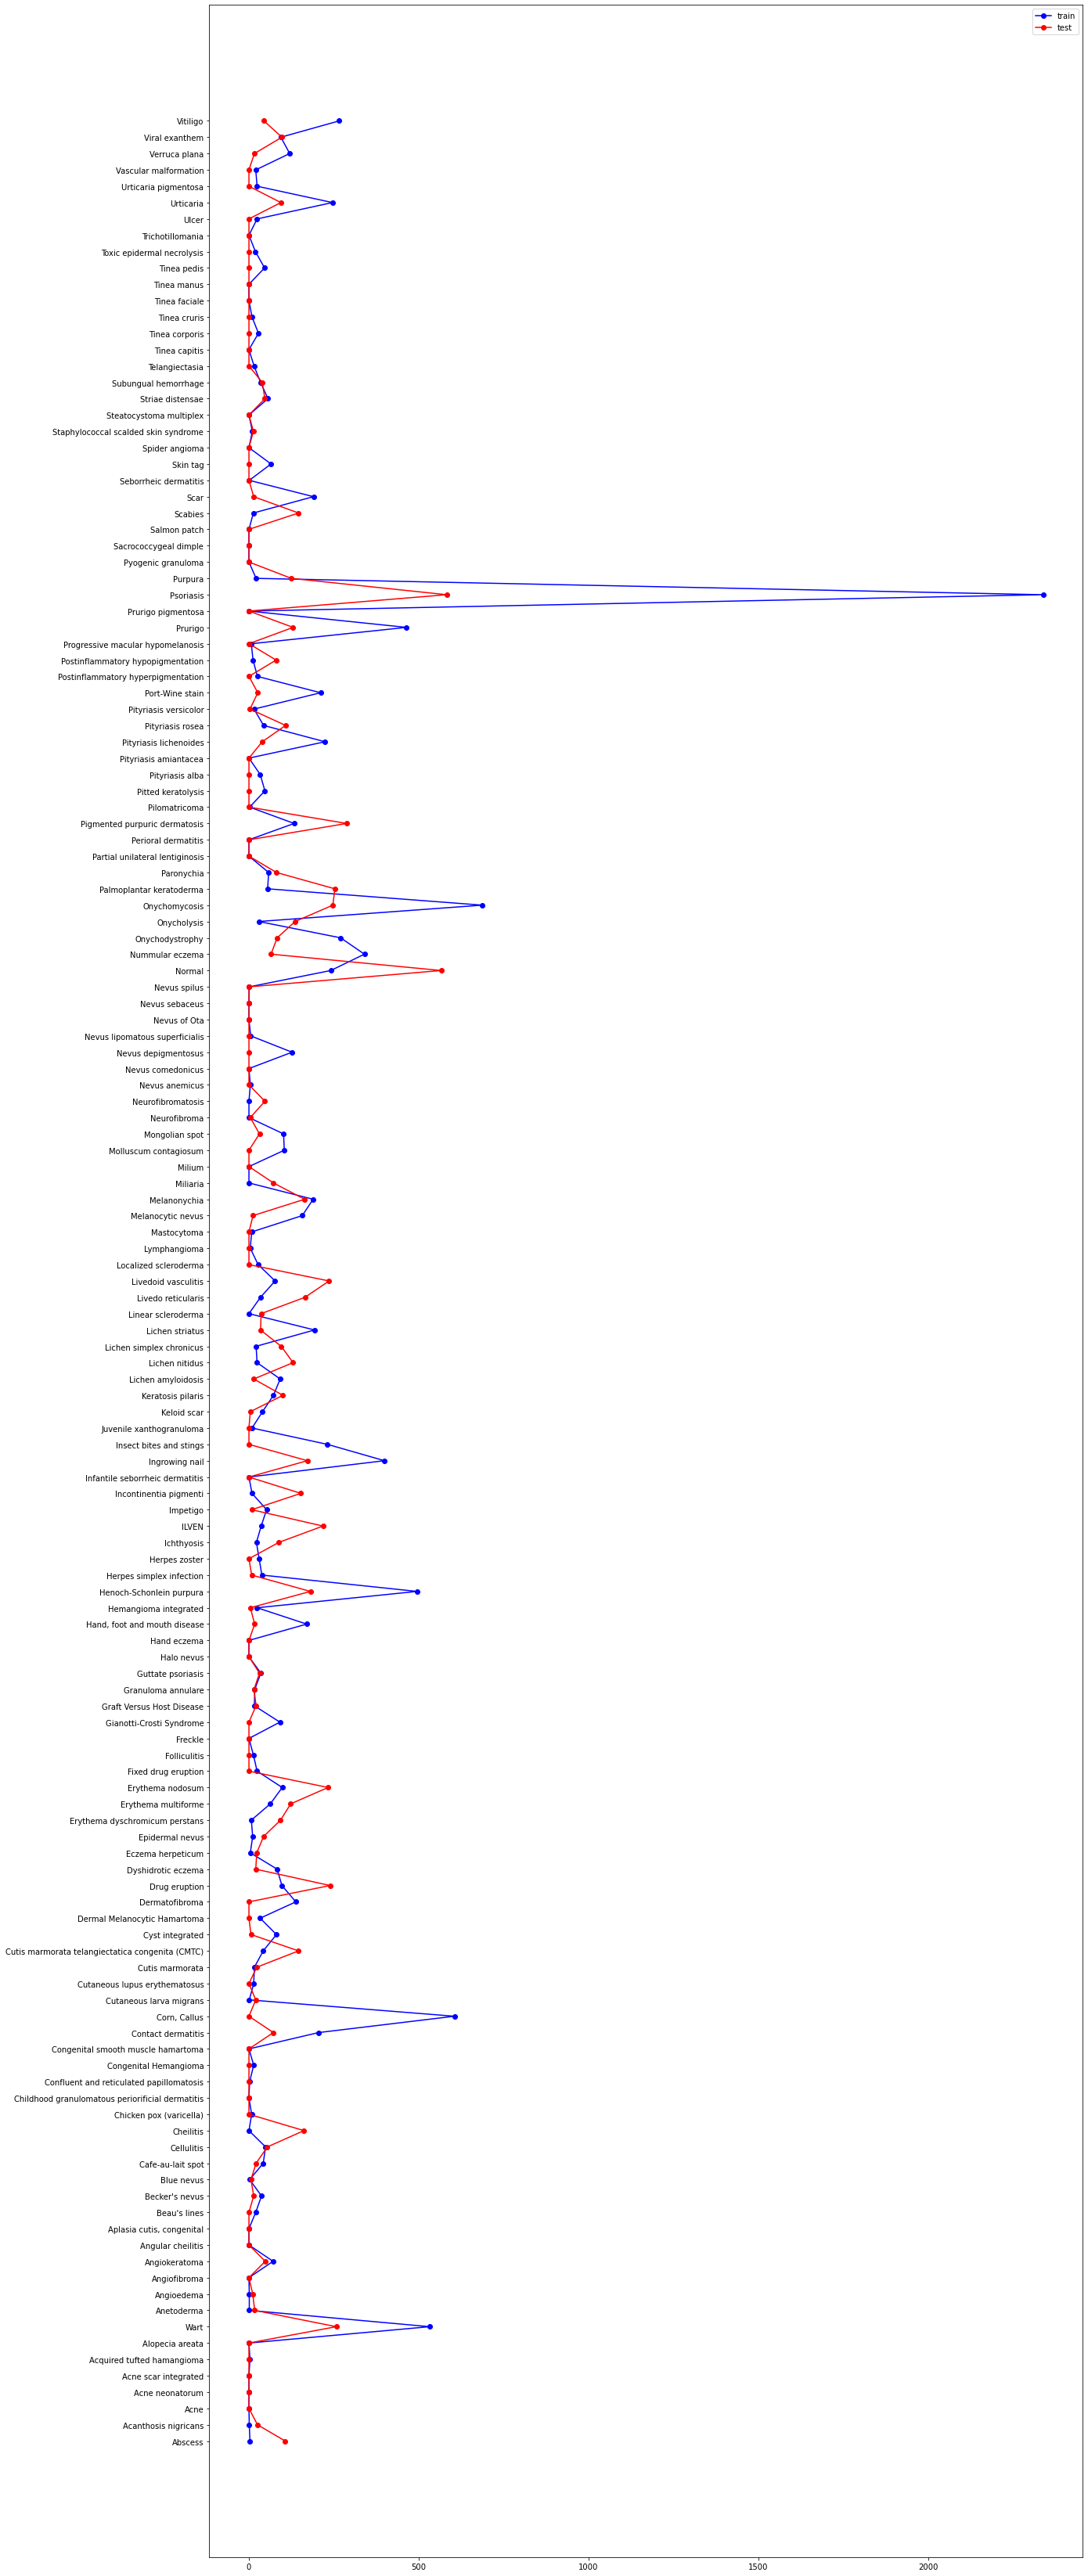

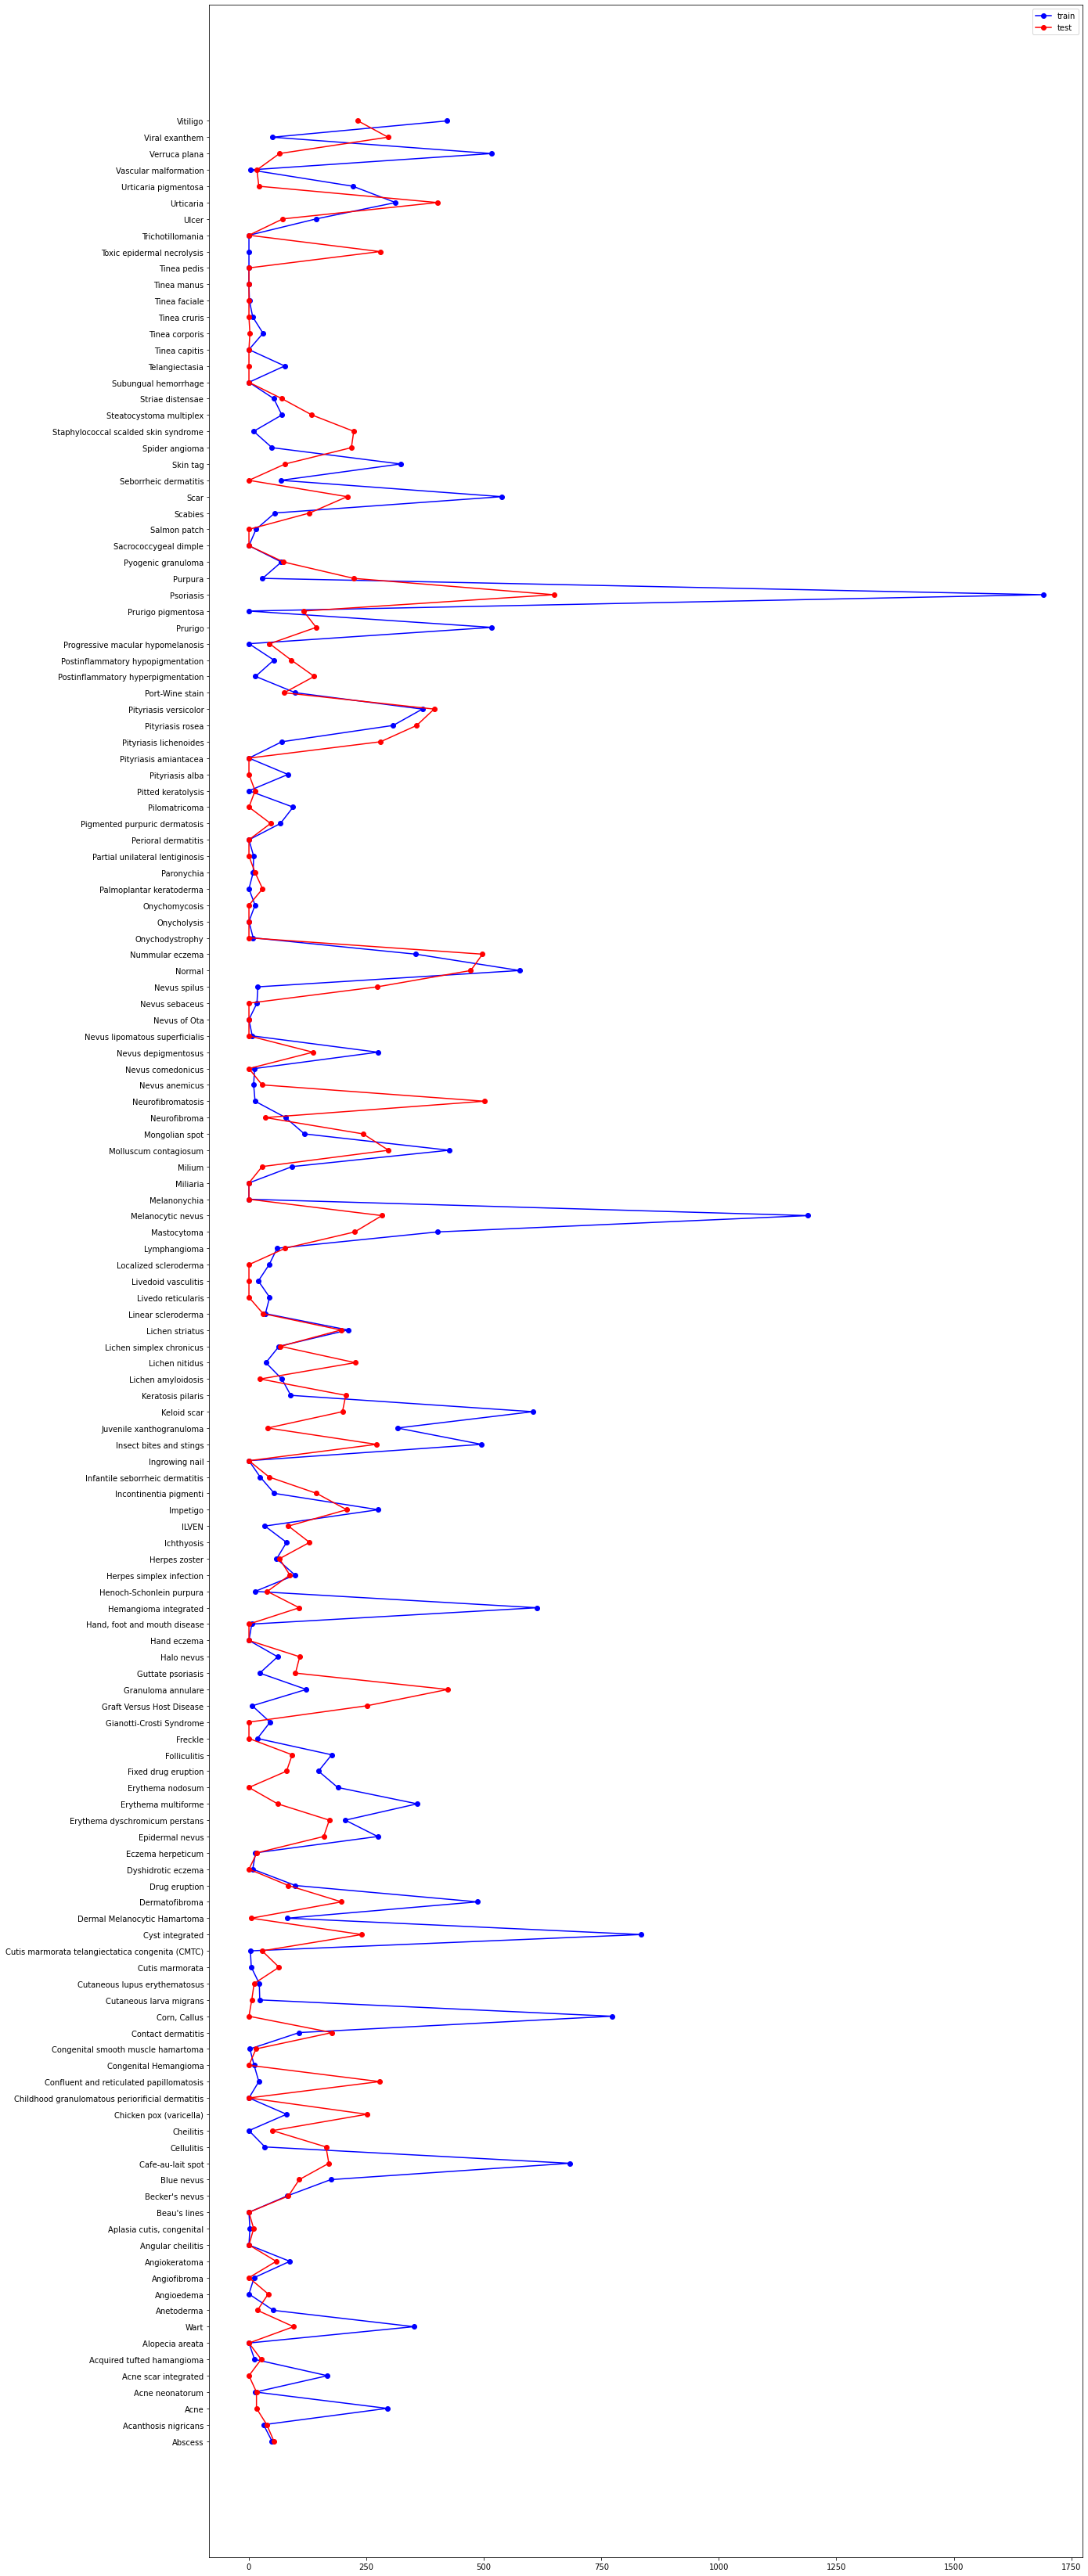

c:\ProgramData\Miniconda3\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [17]:
writer = pd.ExcelWriter('C:/Users/user/Desktop/models/child_skin_classification/plots.xlsx', engine = 'xlsxwriter')
parts = ['total', 'head', 'body', 'upper', 'ass', 'bottom', 'etc']

for part in parts: 
    
    total_list = []
    train_classes_list = {}
    test_classes_list = {}
    
    for i in train_list:
        for cls in os.listdir(os.path.join(base_path, f'H{i}')):
            if os.path.isdir(os.path.join(base_path, f'H{i}', cls)):
                
                if cls not in total_list:
                    total_list.append(cls)

                if cls in train_classes_list:
                    if part == 'total':
                        train_classes_list[cls] += len(glob(os.path.join(base_path, f'H{i}', cls, f'*/*.jpg')))
                    else:
                        train_classes_list[cls] += len(glob(os.path.join(base_path, f'H{i}', cls, f'{part}/*.jpg')))
                else:
                    if part == 'total':
                        train_classes_list[cls] = len(glob(os.path.join(base_path, f'H{i}', cls, f'*/*.jpg')))
                    else:
                        train_classes_list[cls] = len(glob(os.path.join(base_path, f'H{i}', cls, f'{part}/*.jpg')))
                    
                    
    for i in test_list:
        for cls in os.listdir(os.path.join(base_path, f'H{i}')):
            if os.path.isdir(os.path.join(base_path, f'H{i}', cls)):
                
                if cls not in total_list:
                    total_list.append(cls)

                if cls in test_classes_list:
                    if part == 'total':
                        test_classes_list[cls] += len(glob(os.path.join(base_path, f'H{i}', cls, f'*/*.jpg')))
                    else:
                        test_classes_list[cls] += len(glob(os.path.join(base_path, f'H{i}', cls, f'{part}/*.jpg')))
                else:
                    if part == 'total':
                        test_classes_list[cls] = len(glob(os.path.join(base_path, f'H{i}', cls, f'*/*.jpg')))
                    else:
                        test_classes_list[cls] = len(glob(os.path.join(base_path, f'H{i}', cls, f'{part}/*.jpg')))

    total_df = pd.DataFrame(columns=['Disease', 'Train Count', 'Test Count'])

    for i, t in enumerate(total_list):
        total_df.loc[i, 'Disease'] = t 
        total_df.loc[i, 'Train Count'] = train_classes_list[t]
        total_df.loc[i, 'Test Count'] = test_classes_list[t]
        
        
    plt.figure(figsize=(20, 60))
    plt.plot([train_classes_list[i] for i in total_list], total_list, 'bo-', label='train')
    plt.plot([test_classes_list[i] for i in total_list], total_list, 'ro-', label='test')
    plt.legend()
    plt.show() 
        
    total_df.to_excel(writer, sheet_name=part)
    
writer.save()
writer.close()